In [1]:
import pyspark as ps
from pyspark.sql import SparkSession
from pyspark.sql import functions as f
import glob as glob
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

This dataset is approximately 2.3GB and contains fire calls from 2000 - 2022, 6M rows and 34 columns. Locate the dataset
here: https://data.sfgov.org/Public-Safety/Fire-Department-Calls-for-Service/nuek-vuh3.
# 1. Data Cleaning (20 points)

### (a) (1 point) Create a parallelized Spark Context (local[*]) and use it to complete the assignment.

In [2]:
spark = SparkSession.builder \
                    .appName('SF Fires') \
                    .master ('local[*]') \
                    .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/11/06 12:46:21 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


### (b) (1 point) Read the dataset using 0.1% sampling ratio to infer the schema.

In [3]:
sampleDF = spark.read \
                .option('samplingRatio', 0.01) \
                .option('header', 'true') \
                .csv("""Fire_Department_Calls_for_Service.csv""")

In [4]:
sampleDF.columns

['Call Number',
 'Unit ID',
 'Incident Number',
 'Call Type',
 'Call Date',
 'Watch Date',
 'Received DtTm',
 'Entry DtTm',
 'Dispatch DtTm',
 'Response DtTm',
 'On Scene DtTm',
 'Transport DtTm',
 'Hospital DtTm',
 'Call Final Disposition',
 'Available DtTm',
 'Address',
 'City',
 'Zipcode of Incident',
 'Battalion',
 'Station Area',
 'Box',
 'Original Priority',
 'Priority',
 'Final Priority',
 'ALS Unit',
 'Call Type Group',
 'Number of Alarms',
 'Unit Type',
 'Unit sequence in call dispatch',
 'Fire Prevention District',
 'Supervisor District',
 'Neighborhooods - Analysis Boundaries',
 'RowID',
 'case_location',
 'Analysis Neighborhoods']

In [5]:
sampleDF.dtypes

[('Call Number', 'string'),
 ('Unit ID', 'string'),
 ('Incident Number', 'string'),
 ('Call Type', 'string'),
 ('Call Date', 'string'),
 ('Watch Date', 'string'),
 ('Received DtTm', 'string'),
 ('Entry DtTm', 'string'),
 ('Dispatch DtTm', 'string'),
 ('Response DtTm', 'string'),
 ('On Scene DtTm', 'string'),
 ('Transport DtTm', 'string'),
 ('Hospital DtTm', 'string'),
 ('Call Final Disposition', 'string'),
 ('Available DtTm', 'string'),
 ('Address', 'string'),
 ('City', 'string'),
 ('Zipcode of Incident', 'string'),
 ('Battalion', 'string'),
 ('Station Area', 'string'),
 ('Box', 'string'),
 ('Original Priority', 'string'),
 ('Priority', 'string'),
 ('Final Priority', 'string'),
 ('ALS Unit', 'string'),
 ('Call Type Group', 'string'),
 ('Number of Alarms', 'string'),
 ('Unit Type', 'string'),
 ('Unit sequence in call dispatch', 'string'),
 ('Fire Prevention District', 'string'),
 ('Supervisor District', 'string'),
 ('Neighborhooods - Analysis Boundaries', 'string'),
 ('RowID', 'string')

In [6]:
sampleDF.limit(5) \
        .toPandas()

22/11/04 01:09:31 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


,Call Number,Unit ID,Incident Number,Call Type,Call Date,Watch Date,Received DtTm,Entry DtTm,Dispatch DtTm,Response DtTm,...,Call Type Group,Number of Alarms,Unit Type,Unit sequence in call dispatch,Fire Prevention District,Supervisor District,Neighborhooods - Analysis Boundaries,RowID,case_location,Analysis Neighborhoods
0,221210313,E36,22054955,Outside Fire,05/01/2022,04/30/2022,05/01/2022 02:58:25 AM,05/01/2022 02:59:15 AM,05/01/2022 02:59:25 AM,05/01/2022 03:01:06 AM,...,Fire,1,ENGINE,1,2,5,Hayes Valley,221210313-E36,POINT (-122.42316555403964 37.77781524520032),9
1,220190150,E29,22008871,Alarms,01/19/2022,01/18/2022,01/19/2022 01:42:12 AM,01/19/2022 01:44:13 AM,01/19/2022 01:44:28 AM,01/19/2022 01:46:47 AM,...,Alarm,1,ENGINE,1,3,10,Potrero Hill,220190150-E29,POINT (-122.39469970274361 37.76460987856451),26
2,211233271,T07,21053032,Alarms,05/03/2021,05/03/2021,05/03/2021 09:28:12 PM,05/03/2021 09:28:12 PM,05/03/2021 09:28:17 PM,05/03/2021 09:29:10 PM,...,Alarm,1,TRUCK,2,2,9,Mission,211233271-T07,POINT (-122.42057572093252 37.76418194637148),20
3,212933533,B02,21127914,Alarms,10/20/2021,10/20/2021,10/20/2021 10:08:47 PM,10/20/2021 10:09:53 PM,10/20/2021 10:10:07 PM,10/20/2021 10:11:55 PM,...,Alarm,1,CHIEF,3,3,6,Tenderloin,212933533-B02,POINT (-122.41243514072728 37.78347684038771),36
4,221202543,E41,22054815,Alarms,04/30/2022,04/30/2022,04/30/2022 06:35:58 PM,04/30/2022 06:37:28 PM,04/30/2022 06:37:43 PM,04/30/2022 06:38:17 PM,...,Alarm,1,ENGINE,4,4,2,Russian Hill,221202543-E41,POINT (-122.4233369425531 37.799534868680034),32


### (c) (2 points) Create a new column named Delay, which is the difference in minutes (rounded to 2DP) between Response DtTm and Received DtTm. Display the Response DtTm, Received DtTm, and Delay for the record with CallNumber 203350320.


In [82]:
fire_delay_df = sampleDF.withColumn('Delay', \
                                   f.round( \
                                         (f.to_timestamp(f.col('Response DtTm'), 'MM/dd/yyyy hh:mm:ss a') \
                                          - f.to_timestamp(f.col('Received DtTM'), 'MM/dd/yyyy hh:mm:ss a'))\
                                         .cast('long')/60 , 2 )
                                   )

# Select the converted columns
fire_delay_df.select('Response DtTm', 'Received DtTm', 'Delay') \
             .where(f.col('Call Number') == 203350320) \
             .show(truncate=False)


+----------------------+----------------------+-----+
|Response DtTm         |Received DtTm         |Delay|
+----------------------+----------------------+-----+
|11/30/2020 06:24:05 AM|11/30/2020 06:21:14 AM|2.85 |
|null                  |11/30/2020 06:21:14 AM|null |
|null                  |11/30/2020 06:21:14 AM|null |
|11/30/2020 06:23:56 AM|11/30/2020 06:21:14 AM|2.7  |
|11/30/2020 06:22:45 AM|11/30/2020 06:21:14 AM|1.52 |
+----------------------+----------------------+-----+



### (d) (2 points) Drop the following columns from the dataset and arrange the data such that the same schema from the tutorial given in class can be used to read the dataset: Received DtTm, Entry DtTm, Dispatch DtTm, Response DtTm, On Scene DtTm, Transport DtTm, Hospital DtTm

In [10]:
reformatted_df = fire_delay_df \
                              .drop('Received DtTm', 'Entry DtTm', 'Dispatch DtTm', 'Response DtTm', 'On Scene DtTm', 'Transport DtTm', 'Hospital DtTm') \
                              .select('Call Number',
                                    'Unit ID',
                                    'Incident Number',
                                    'Call Type',
                                    'Call Date',
                                    'Watch Date',
                                    'Call Final Disposition',
                                    'Available DtTm',
                                    'Address',
                                    'City',
                                    'Zipcode of Incident',
                                    'Battalion',
                                    'Station Area',
                                    'Box',
                                    'Original Priority',
                                    'Priority',
                                    'Final Priority',
                                    'ALS Unit',
                                    'Call Type Group',
                                    'Number of Alarms',
                                    'Unit Type',
                                    'Unit Sequence In Call Dispatch',
                                    'Fire Prevention District',
                                    'Supervisor District',
                                    'Neighborhooods - Analysis Boundaries',
                                    'case_location',
                                    'RowID',
                                    'Delay')

### (e) (2 points) Save the modified dataset with only the columns featured in the in-class tutorial to a single CSV file


In [11]:
reformatted_df.columns

['Call Number',
 'Unit ID',
 'Incident Number',
 'Call Type',
 'Call Date',
 'Watch Date',
 'Call Final Disposition',
 'Available DtTm',
 'Address',
 'City',
 'Zipcode of Incident',
 'Battalion',
 'Station Area',
 'Box',
 'Original Priority',
 'Priority',
 'Final Priority',
 'ALS Unit',
 'Call Type Group',
 'Number of Alarms',
 'Unit Type',
 'Unit Sequence In Call Dispatch',
 'Fire Prevention District',
 'Supervisor District',
 'Neighborhooods - Analysis Boundaries',
 'case_location',
 'RowID',
 'Delay']

In [ ]:
reformatted_df.coalesce(1).write \
                          .option('header', 'false') \
                          .csv('./datacsv/')

### (f) (1 point) Read the updated dataset using the schema provided in the in-class tutorial

In [6]:
from pyspark.sql.types import *

fire_schema = StructType([StructField('CallNumber', IntegerType(), True),
                StructField('UnitID', StringType(), True),
                StructField('IncidentNumber', IntegerType(), True),
                StructField('CallType', StringType(), True),
                StructField('CallDate', StringType(), True),
                StructField('WatchDate', StringType(), True),
                StructField('CallFinalDisposition', StringType(), True),
                StructField('AvailableDtTm', StringType(), True),
                StructField('Address', StringType(), True),
                StructField('City', StringType(), True),
                StructField('Zipcode', IntegerType(), True),
                StructField('Battalion', StringType(), True),
                StructField('StationArea', StringType(), True),
                StructField('Box', StringType(), True),
                StructField('OriginalPriority', StringType(), True),
                StructField('Priority', StringType(), True),
                StructField('FinalPriority', IntegerType(), True),
                StructField('ALSUnit', BooleanType(), True),
                StructField('CallTypeGroup', StringType(), True),
                StructField('NumAlarms', IntegerType(), True),
                StructField('UnitType', StringType(), True),
                StructField('UnitSequenceInCallDispatch', IntegerType(), True),
                StructField('FirePreventionDistrict', StringType(), True),
                StructField('SupervisorDistrict', StringType(), True),
                StructField('Neighborhood', StringType(), True),
                StructField('Location', StringType(), True),
                StructField('RowID', StringType(), True),
                StructField('Delay', FloatType(), True)])



In [7]:
filecsv = glob.glob('./datacsv/*.csv')

In [8]:
print(filecsv)

['./datacsv/part-00000-94740680-f4dd-4c4a-abef-23930004c222-c000.csv']


In [9]:
fire_df = spark.read.csv(filecsv[0], header=False, schema=fire_schema)

### (g) (1 point) Return a list of 10 Distinct Call Types

In [10]:
fire_df.select(f.col('CallType').alias('DistinctCallTypes')) \
       .where(f.col('CallType').isNotNull()) \
       .distinct() \
       .show(10, False)

+-----------------------------------+
|DistinctCallTypes                  |
+-----------------------------------+
|Elevator / Escalator Rescue        |
|Marine Fire                        |
|Aircraft Emergency                 |
|Confined Space / Structure Collapse|
|Administrative                     |
|Alarms                             |
|Odor (Strange / Unknown)           |
|Citizen Assist / Service Call      |
|HazMat                             |
|Watercraft in Distress             |
+-----------------------------------+
only showing top 10 rows



### (h) (1 point) Return a count of the distinct Call Types

In [11]:
fire_df.select('CallType') \
       .where(f.col('CallType').isNotNull()) \
       .agg(f.countDistinct('CallType').alias('DistinctCallTypesCount')) \
       .show()

+----------------------+
|DistinctCallTypesCount|
+----------------------+
|                    32|
+----------------------+



### (i) (1 point) Rename the Delay column to ResponseDelayedinMins and return the top 5 records (sorted by ResponseDelayedinMins in descending order) where ResponseDelayedinMins > 5 (Show only the ResponseDelayedinMins column in your output)


In [12]:
renamed_df = fire_df.withColumnRenamed('Delay', 'ResponseDelayedinMins')


In [13]:
renamed_df.select('ResponseDelayedinMins') \
          .where(f.col('ResponseDelayedinMins') > 5) \
          .show(5, False)

+---------------------+
|ResponseDelayedinMins|
+---------------------+
|23.83                |
|20.9                 |
|5.27                 |
|5.2                  |
|6.3                  |
+---------------------+
only showing top 5 rows



### (j) (2 points) Return a list of the top 10 delayed Fire Responses sorted in descending order and showing the Call Type, Address (Full address in title-case in one column including City and Zip Code), Battalion, ResponseDelayedinMins, and Unit Type


In [14]:
top_responses = renamed_df.select('CallNumber', 'CallType', f.array(['Address', 'City', 'Zipcode']), 'Battalion', 'ResponseDelayedinMins', 'UnitType') \
              .sort(f.col('ResponseDelayedinMins').desc())\

top_responses.show(10, False)

+----------+----------------------------------+-------------------------------------------------+---------+---------------------+-------------+
|CallNumber|CallType                          |array(Address, City, Zipcode)                    |Battalion|ResponseDelayedinMins|UnitType     |
+----------+----------------------------------+-------------------------------------------------+---------+---------------------+-------------+
|201440320 |Structure Fire                    |[200 Block of JEFFERSON ST, San Francisco, 94133]|B01      |2465.28              |ENGINE       |
|201440320 |Structure Fire                    |[200 Block of JEFFERSON ST, San Francisco, 94133]|B01      |2234.07              |ENGINE       |
|203020714 |Mutual Aid / Assist Outside Agency|[BLUE RIDGE FIRE, null, 94110]                   |B06      |2176.63              |ENGINE       |
|201440320 |Structure Fire                    |[200 Block of JEFFERSON ST, San Francisco, 94133]|B01      |1997.77              |ENGINE 

### (k) (2 points) Create a horizontal bar chart of the top 10 delayed Fire Responses (ResponseDelayedinMins vs Call Number)


In [15]:
pandas_df = (top_responses.select('CallNumber', 'ResponseDelayedinMins')).toPandas().head(10)

<AxesSubplot: ylabel='CallNumber'>

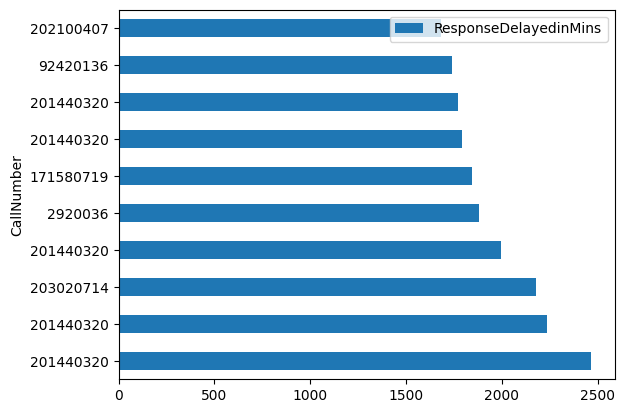

In [16]:
pandas_df.plot(kind="barh", x="CallNumber",y="ResponseDelayedinMins")

### (l) (2 points) Convert the following fields to date: CallDate, WatchDate, AvailableDtTm


In [17]:
date_df = renamed_df.withColumn('CallDate', f.to_date('CallDate', 'MM/dd/yyyy')) \
                    .withColumn('WatchDate', f.to_date('CallDate', 'MM/dd/yyyy')) \
                    .withColumn('AvailableDtTm', f.to_date('CallDate','MM/dd/yyyy'))

### (m) (2 points) Show a complete list of the distinct years represented in the dataset based on the IncidentDate

In [18]:
distinct_years = date_df.withColumn('CallDate', f.date_format('CallDate','yyyy'))

In [19]:
years = distinct_years.select('CallDate') \
                      .distinct() \
                      .orderBy('CallDate') \
                      .collect()

In [20]:
for row in years:
    print(row['CallDate'])

2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022


# 2. EDA (20 points)

### (a) (2 points) Create a MonthYear Column in the dataset of the format YYYYMM (eg: 202209) based on the IncidentDate

In [21]:
monthyear_df = date_df.withColumn('MonthYear', f.date_format('CallDate','yyyyMM'))

In [22]:
monthyear_df.select('MonthYear').show(5,False)

+---------+
|MonthYear|
+---------+
|202205   |
|202201   |
|202105   |
|202110   |
|202204   |
+---------+
only showing top 5 rows



### (b) (10 points) Create an in-memory DataFrame that stores the Temperature and the MonthYear from Global Summary of the Month (GSOM) data dynamically harvested from the NOAA API from the weather station located Downtown, San Francisco.

In [143]:
from dotenv import load_dotenv
from pprint import pprint
import requests
import os
import datetime

load_dotenv('./variables.env')

api_key = os.environ.get('NOAA_API_KEY')
headers = {'token':api_key}

# GHCND:USW00023272 SF Downtown
offsetarg = 1
start = 2000
startend = start + 9
end = 2022
limitarg = 1000
datasetidarg = 'GSOM'
stationidarg = 'GHCND:USW00023272'
datatypeidarg = 'TAVG'

pageurl = '''\
https://www.ncei.noaa.gov/cdo-web/api/v2/data\
?datasetid={datasetid}\
&stationid={stationid}\
&datatypeid={datatypeid}
&units=standard&\
&startdate={start}-01-01\
&enddate={end}-12-31\
&limit={limit}\
&offset={offset}\
'''


currentend = datetime.datetime.strptime(str(startend)+'-12', '%Y-%m')
yearend = datetime.datetime.strptime(str(end)+'-12', '%Y-%m')

temperature = []


#Pagination
while True:
    url = pageurl.format(datasetid = datasetidarg,\
          stationid = stationidarg, \
          datatypeid=datatypeidarg, \
          start= start, \
          end = startend, \
          limit = limitarg, \
          offset = offsetarg)
    
    # print(url)
    response = requests.get(url, headers=headers)
    
    if response.status_code == 200:
        json = response.json()
        count = json['metadata']['resultset']['count']
        limit = json['metadata']['resultset']['limit']
        offset = json['metadata']['resultset']['offset']
        
        temperature.extend(json['results'])
        # pprint(json)
        # print(count)
        
        current = datetime.datetime.strptime(temperature[-1]['date'][:7], '%Y-%m')
        # print(current)
        # print(currentend)
        
        if startend == end:
            break
        
        if offset*limit < count:
            offset += 1
            
        if current >= currentend:
            start += 10
            startend = start + 9
            currentend = datetime.datetime.strptime(str(startend)+'-12', '%Y-%m')
            offset = 0

        if currentend >= yearend:
            startend = end
            currentend = yearend
            
    else:
        print(response.content)
        break;
        
# pprint(temperature)
# for x in temperature:
#     x.update((k, float(v)) for k, v in x.items()  if k == 'value')
        
# pprint(temperature[1])
# temperature_float = [{**x,{'value':float(x['value'])}} for x in temperature]

pprint(len(temperature))
temp_df = spark.createDataFrame(temperature[3:]).drop('attributes','datatype', 'station') \
                                            .withColumn('date', f.date_format(f.to_date('date'), 'yyyyMM')) \
                                            .withColumnRenamed('date', 'MonthYear') \
                                            .withColumnRenamed('value', 'AverageTemperature')


273


In [144]:
monthyear_df.groupBy('MonthYear') \
            .count() \
            .orderBy('MonthYear') \
            .count()

271

In [145]:
temp_df.groupBy('MonthYear') \
        .count() \
        .orderBy('MonthYear') \
        .count()

270

### (c) (5 points) Augment the dataset with the temperature data and group the data by MonthYear


In [146]:
#inner join the dataset

augmented_df = monthyear_df.join(temp_df,'MonthYear') \
                           .groupBy('MonthYear')


### (3 points) Answer the following question: Is there correlation between the average monthly temperature and the number of fire calls per month?

In [147]:
corr_df = augmented_df.agg( \
                        f.count('MonthYear').alias('CallsPerMonth'), \
                        f.round(f.avg('AverageTemperature'),2).alias('AverageTemperature'))

### Temperature values are in Celcius

In [148]:
corr_df.orderBy('CallsPerMonth').show()

+---------+-------------+------------------+
|MonthYear|CallsPerMonth|AverageTemperature|
+---------+-------------+------------------+
|   200004|        10059|              57.1|
|   202204|        16067|              55.7|
|   200109|        16800|              61.0|
|   200102|        16968|              52.1|
|   200011|        17501|              53.8|
|   200502|        17515|              55.8|
|   200411|        17747|              56.5|
|   200104|        17751|              52.5|
|   200204|        17783|              54.8|
|   200111|        17885|              58.6|
|   200504|        17913|              55.9|
|   200702|        17995|              53.0|
|   200209|        18016|              61.5|
|   200206|        18129|              58.0|
|   200207|        18142|              59.2|
|   200302|        18204|              54.6|
|   200006|        18233|              59.5|
|   200107|        18243|              60.5|
|   200208|        18397|              60.4|
|   200108

In [149]:
corr_matrix = corr_df.toPandas().corr()

In [150]:
corr_matrix

,CallsPerMonth,AverageTemperature
CallsPerMonth,1.000000,0.128636
AverageTemperature,0.128636,1.000000


In [151]:
 corr_graph = corr_df.toPandas()

In [152]:
corr_graph.sort_values(by=['CallsPerMonth'], ascending=False)

,MonthYear,CallsPerMonth,AverageTemperature
215,201910,29209,63.1
46,202208,29150,63.2
74,202112,28748,50.8
235,201912,28630,53.6
131,201909,28521,65.1
...,...,...,...
80,200011,17501,53.8
223,200102,16968,52.1
94,200109,16800,61.0
54,202204,16067,55.7


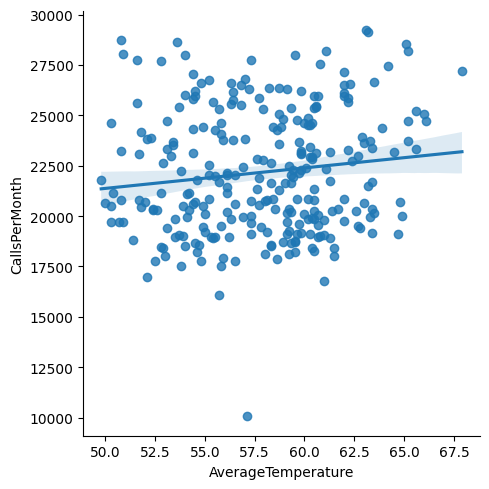

In [153]:
import seaborn as sns
sns.lmplot(x='AverageTemperature', y = 'CallsPerMonth' ,data= corr_graph)

In [154]:
corr_df.stat.corr('CallsPerMonth', 'AverageTemperature')

0.12863612894349857

----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 60031)
Traceback (most recent call last):
  File "/Users/Mjhon/opt/anaconda3/envs/saturnbase/lib/python3.9/socketserver.py", line 316, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/Users/Mjhon/opt/anaconda3/envs/saturnbase/lib/python3.9/socketserver.py", line 347, in process_request
    self.finish_request(request, client_address)
  File "/Users/Mjhon/opt/anaconda3/envs/saturnbase/lib/python3.9/socketserver.py", line 360, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/Users/Mjhon/opt/anaconda3/envs/saturnbase/lib/python3.9/socketserver.py", line 747, in __init__
    self.handle()
  File "/Users/Mjhon/opt/anaconda3/envs/saturnbase/lib/python3.9/site-packages/pyspark/accumulators.py", line 281, in handle
    poll(accum_updates)
  File "/Users/Mjhon/opt/anaconda3/envs/saturnbase/lib/python3.9/site-packag

#### There is a small positive correlation between Calls per month and average temperature per month